# Understanding results for overall model

## Prepare results table

In [1]:
import pipeline as pp
import pandas as pd
import config

In [2]:
r2016_1 = pd.read_csv("results/results_2016-RF,DT,LR.csv")
r2016_2 = pd.read_csv("results/results_2016-others.csv")
r2017_1 = pd.read_csv("results/results_2017-RF,DT,LR.csv")
r2017_2 = pd.read_csv("results/results_2017-others.csv")
r2018_1 = pd.read_csv("results/results_2018-RF,DT,LR.csv")
#r2018_2 = pd.read_csv("results/results_2018-others.csv")

results = pd.DataFrame(columns=r2016_1.columns)
r = [r2016_1, r2016_2, r2017_1, r2017_2, r2018_1] #, r2018_2]
for df in r:
    results = results.append(df)

In [3]:
results2016 = results[results['year']==2016]
results2017 = results[results['year']==2017]
results2018 = results[results['year']==2018]

In [4]:
print(len(results2016))
print(len(results2017))
print(len(results2018))

274
274
104


## Get best model by train-test sets

In [5]:
time_col = config.TRAIN_TEST_COL
test_years = list(range(2016,2019))
cols = ['year', 'baseline', 'accuracy_20', 'recall_20', 'precision_20', 'f1_20', 'auc', 'classifiers','parameters']
metric = 'recall_20'

# Get highest recall by each of the train-test sets
best_models = pp.get_best_models(results, time_col, test_years, cols, metric)

For train-test set 2016, highest recall_20 attained is 0.9281228192602929
For train-test set 2017, highest recall_20 attained is 1.0
For train-test set 2018, highest recall_20 attained is 0.9942129629629628


In [6]:
best_models

,year,baseline,accuracy_20,recall_20,precision_20,f1_20,auc,classifiers,parameters
145,2016,0.091554,0.878418,0.928123,0.424920,0.58295,0.953386,GradientBoostingClassifier(criterion='friedman...,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti..."
146,2017,0.094994,0.894994,1.000000,0.474969,0.64404,0.971463,GradientBoostingClassifier(criterion='friedman...,"{'learning_rate': 0.1, 'max_depth': 10, 'n_est..."
147,2017,0.094994,0.894994,1.000000,0.474969,0.64404,0.974243,GradientBoostingClassifier(criterion='friedman...,"{'learning_rate': 0.1, 'max_depth': 10, 'n_est..."
80,2018,0.047992,0.847414,0.994213,0.238545,0.38477,0.988099,"DecisionTreeClassifier(class_weight=None, crit...","{'criterion': 'gini', 'max_depth': 10, 'min_sa..."


#### Top-k best models

In [7]:
metric = 'recall_20'
top_k = 10

topk2016 = pp.sort_models(results2016, metric, top_k, cols)
topk2017 = pp.sort_models(results2017, metric, top_k, cols)
topk2018 = pp.sort_models(results2018, metric, top_k, cols)

In [8]:
topk2016

,year,baseline,accuracy_20,recall_20,precision_20,f1_20,auc,classifiers,parameters
145,2016,0.091554,0.878418,0.928123,0.424920,0.582950,0.953386,GradientBoostingClassifier(criterion='friedman...,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti..."
147,2016,0.091554,0.877396,0.922540,0.422364,0.579443,0.953628,GradientBoostingClassifier(criterion='friedman...,"{'learning_rate': 0.1, 'max_depth': 10, 'n_est..."
153,2016,0.091554,0.875224,0.910677,0.416933,0.571992,0.948545,"BaggingClassifier(base_estimator=None, bootstr...","{'n_estimators': 100, 'n_jobs': None, 'random_..."
146,2016,0.091554,0.873562,0.901605,0.412780,0.566294,0.950028,GradientBoostingClassifier(criterion='friedman...,"{'learning_rate': 0.1, 'max_depth': 10, 'n_est..."
92,2016,0.091554,0.871390,0.889742,0.407348,0.558843,0.947099,"DecisionTreeClassifier(class_weight=None, crit...","{'criterion': 'entropy', 'max_depth': 10, 'min..."
152,2016,0.091554,0.871135,0.888346,0.406709,0.557966,0.909051,"BaggingClassifier(base_estimator=None, bootstr...","{'n_estimators': 10, 'n_jobs': None, 'random_s..."
80,2016,0.091554,0.870879,0.886950,0.406070,0.557090,0.947375,"DecisionTreeClassifier(class_weight=None, crit...","{'criterion': 'gini', 'max_depth': 10, 'min_sa..."
91,2016,0.091554,0.870496,0.884857,0.405112,0.555775,0.943905,"DecisionTreeClassifier(class_weight=None, crit...","{'criterion': 'entropy', 'max_depth': 10, 'min..."
151,2016,0.091554,0.870368,0.884159,0.404792,0.555336,0.945178,"AdaBoostClassifier(algorithm='SAMME.R',\n ...","{'algorithm': 'SAMME.R', 'n_estimators': 100, ..."
78,2016,0.091554,0.869985,0.882066,0.403834,0.554021,0.936355,"DecisionTreeClassifier(class_weight=None, crit...","{'criterion': 'gini', 'max_depth': 10, 'min_sa..."


In [9]:
topk2017

,year,baseline,accuracy_20,recall_20,precision_20,f1_20,auc,classifiers,parameters
147,2017,0.094994,0.894994,1.000000,0.474969,0.644040,0.974243,GradientBoostingClassifier(criterion='friedman...,"{'learning_rate': 0.1, 'max_depth': 10, 'n_est..."
146,2017,0.094994,0.894994,1.000000,0.474969,0.644040,0.971463,GradientBoostingClassifier(criterion='friedman...,"{'learning_rate': 0.1, 'max_depth': 10, 'n_est..."
153,2017,0.094994,0.894139,0.995501,0.472833,0.641142,0.968748,"BaggingClassifier(base_estimator=None, bootstr...","{'n_estimators': 100, 'n_jobs': None, 'random_..."
145,2017,0.094994,0.893407,0.991645,0.471001,0.638659,0.972633,GradientBoostingClassifier(criterion='friedman...,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti..."
92,2017,0.094994,0.893284,0.991003,0.470696,0.638245,0.966339,"DecisionTreeClassifier(class_weight=None, crit...","{'criterion': 'entropy', 'max_depth': 10, 'min..."
80,2017,0.094994,0.891575,0.982005,0.466422,0.632450,0.966581,"DecisionTreeClassifier(class_weight=None, crit...","{'criterion': 'gini', 'max_depth': 10, 'min_sa..."
91,2017,0.094994,0.891087,0.979434,0.465201,0.630795,0.961054,"DecisionTreeClassifier(class_weight=None, crit...","{'criterion': 'entropy', 'max_depth': 10, 'min..."
90,2017,0.094994,0.890965,0.978792,0.464896,0.630381,0.960663,"DecisionTreeClassifier(class_weight=None, crit...","{'criterion': 'entropy', 'max_depth': 10, 'min..."
144,2017,0.094994,0.889377,0.970437,0.460928,0.625000,0.963959,GradientBoostingClassifier(criterion='friedman...,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti..."
79,2017,0.094994,0.889011,0.968509,0.460012,0.623758,0.958229,"DecisionTreeClassifier(class_weight=None, crit...","{'criterion': 'gini', 'max_depth': 10, 'min_sa..."


In [10]:
topk2018

,year,baseline,accuracy_20,recall_20,precision_20,f1_20,auc,classifiers,parameters
80,2018,0.047992,0.847414,0.994213,0.238545,0.384770,0.988099,"DecisionTreeClassifier(class_weight=None, crit...","{'criterion': 'gini', 'max_depth': 10, 'min_sa..."
79,2018,0.047992,0.847303,0.993056,0.238267,0.384323,0.986788,"DecisionTreeClassifier(class_weight=None, crit...","{'criterion': 'gini', 'max_depth': 10, 'min_sa..."
78,2018,0.047992,0.846859,0.988426,0.237156,0.382531,0.984885,"DecisionTreeClassifier(class_weight=None, crit...","{'criterion': 'gini', 'max_depth': 10, 'min_sa..."
92,2018,0.047992,0.846637,0.986111,0.236601,0.381635,0.985596,"DecisionTreeClassifier(class_weight=None, crit...","{'criterion': 'entropy', 'max_depth': 10, 'min..."
91,2018,0.047992,0.846303,0.982639,0.235768,0.380291,0.983670,"DecisionTreeClassifier(class_weight=None, crit...","{'criterion': 'entropy', 'max_depth': 10, 'min..."
90,2018,0.047992,0.845970,0.979167,0.234935,0.378947,0.981792,"DecisionTreeClassifier(class_weight=None, crit...","{'criterion': 'entropy', 'max_depth': 10, 'min..."
83,2018,0.047992,0.845081,0.969907,0.232713,0.375364,0.974815,"DecisionTreeClassifier(class_weight=None, crit...","{'criterion': 'gini', 'max_depth': 20, 'min_sa..."
56,2018,0.047992,0.843526,0.953704,0.228825,0.369093,0.963519,"RandomForestClassifier(bootstrap=True, class_w...","{'max_depth': 20, 'max_features': 'sqrt', 'min..."
59,2018,0.047992,0.843415,0.952546,0.228548,0.368645,0.962997,"RandomForestClassifier(bootstrap=True, class_w...","{'max_depth': 20, 'max_features': 'sqrt', 'min..."
62,2018,0.047992,0.843415,0.952546,0.228548,0.368645,0.961420,"RandomForestClassifier(bootstrap=True, class_w...","{'max_depth': 20, 'max_features': 'sqrt', 'min..."


## Get Stability Score

In [11]:
pp.get_stability_score([results2016,results2017,results2018], metric, cols)

,,baseline,accuracy_20,recall_20,precision_20,f1_20,auc,rank
classifiers,parameters,,,,,,,
"GradientBoostingClassifier(criterion='friedman_mse', init=None,\n learning_rate=0.1, loss='deviance', max_depth=10,\n max_features=None, max_leaf_nodes=None,\n min_impurity_decrease=0.0, min_impurity_split=None,\n min_samples_leaf=1, min_samples_split=2,\n min_weight_fraction_leaf=0.0, n_estimators=100,\n n_iter_no_change=None, presort='auto', random_state=0,\n subsample=0.5, tol=0.0001, validation_fraction=0.1,\n verbose=0, warm_start=False)","{'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 100, 'random_state': 0, 'subsample': 0.5}",0.093274,0.886195,0.961270,0.448667,0.611742,0.963935,0.500000
"GradientBoostingClassifier(criterion='friedman_mse', init=None,\n learning_rate=0.1, loss='deviance', max_depth=5,\n max_features=None, max_leaf_nodes=None,\n min_impurity_decrease=0.0, min_impurity_split=None,\n min_samples_leaf=1, min_samples_split=2,\n min_weight_fraction_leaf=0.0, n_estimators=100,\n n_iter_no_change=None, presort='auto', random_state=0,\n subsample=0.5, tol=0.0001, validation_fraction=0.1,\n verbose=0, warm_start=False)","{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'random_state': 0, 'subsample': 0.5}",0.093274,0.885912,0.959884,0.447961,0.610804,0.963010,1.500000
"GradientBoostingClassifier(criterion='friedman_mse', init=None,\n learning_rate=0.1, loss='deviance', max_depth=10,\n max_features=None, max_leaf_nodes=None,\n min_impurity_decrease=0.0, min_impurity_split=None,\n min_samples_leaf=1, min_samples_split=2,\n min_weight_fraction_leaf=0.0, n_estimators=10,\n n_iter_no_change=None, presort='auto', random_state=0,\n subsample=0.5, tol=0.0001, validation_fraction=0.1,\n verbose=0, warm_start=False)","{'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 10, 'random_state': 0, 'subsample': 0.5}",0.093274,0.884278,0.950803,0.443875,0.605167,0.960745,2.000000
"BaggingClassifier(base_estimator=None, bootstrap=True,\n bootstrap_features=False, max_features=1.0, max_samples=1.0,\n n_estimators=100, n_jobs=None, oob_score=False, random_state=0,\n verbose=0, warm_start=False)","{'n_estimators': 100, 'n_jobs': None, 'random_state': 0}",0.093274,0.884681,0.953089,0.444883,0.606567,0.958647,2.000000
"DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,\n max_features=None, max_leaf_nodes=None,\n min_impurity_decrease=0.0, min_impurity_split=None,\n min_samples_leaf=1, min_samples_split=50,\n min_weight_fraction_leaf=0.0, presort=False, random_state=0,\n splitter='best')","{'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 50, 'random_state': 0}",0.078180,0.869956,0.954390,0.370346,0.524770,0.967352,3.666667
"DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,\n max_features=None, max_leaf_nodes=None,\n min_impurity_decrease=0.0, min_impurity_split=None,\n min_samples_leaf=1, min_samples_split=50,\n min_weight_fraction_leaf=0.0, presort=False, random_state=0,\n splitter='best')","{'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 50, 'random_state': 0}",0.078180,0.870437,0.955618,0.371548,0.526241,0.966345,3.666667
"DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,\n max_features=None, max_leaf_nodes=None,\n min_impurity_decrease=0.0, min_impurity_split=None,\n min_samples_leaf=1, min_samples_split=10,\n min_weight_fraction_leaf=0.0, presort=False, random_state=0,\n splitter='best')","{'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 10, 'random_state': 0}",0.078180,0.869295,0.948977,0.368694,0.522287,0.962876,5.666667
"DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,\n max_features=None, max_leaf_nodes=None,\n min_impurity_decrease=0.0, min_impurity_split=None,\n min_samples_leaf=1, min_samples_split=2,\n min_weight_fraction_leaf=0.0, presort=False, random_state=0,\n splitter='best')","{'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 2, 'random_state': 0}",0.07818

## Plot Metric Graph over traintest sets

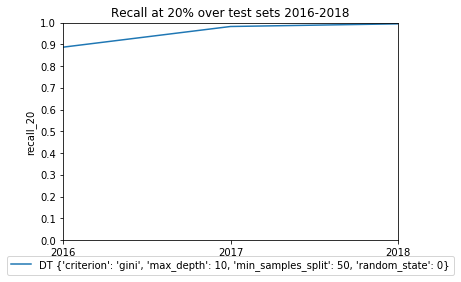

In [13]:
# To be edited to the graphs we want 

metric='recall_20'
model_and_para = [('DT', "{'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 50, 'random_state': 0}")]
# ADD MORE PLOTS HERE


baseline= None #[0.091554, 0.094994, 0.047992]
title='Recall at 20% over test sets 2016-2018'
filename='recall_test2016-2018'
pp.get_metric_graph(results, metric, model_and_para, baseline, time_col, test_years, title, filename, save=False)